<a href="https://colab.research.google.com/github/VenkatAmit/ideal-system/blob/main/Data_preprocessing_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_policy = pd.read_csv('/content/Countrypolicy.csv')
df_policy.head()

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,CPIA building human resources rating (1=low to...,IQ.CPA.HRES.XQ,..,2,2
1,Afghanistan,AFG,CPIA business regulatory environment rating (1...,IQ.CPA.BREG.XQ,..,2,2
2,Afghanistan,AFG,CPIA debt policy rating (1=low to 6=high),IQ.CPA.DEBT.XQ,..,1.5,1.5
3,Afghanistan,AFG,CPIA economic management cluster average (1=lo...,IQ.CPA.ECON.XQ,..,1.333333,1.166667
4,Afghanistan,AFG,CPIA efficiency of revenue mobilization rating...,IQ.CPA.REVN.XQ,..,2.5,2.5


In [7]:
df_policy.info()
# Count missing values in each column
missing_values = df_policy.isnull().sum()

missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   1745 non-null   object
 1   Country Code   1743 non-null   object
 2   Series Name    1743 non-null   object
 3   Series Code    1743 non-null   object
 4   2021 [YR2021]  1743 non-null   object
 5   2022 [YR2022]  1743 non-null   object
 6   2023 [YR2023]  1743 non-null   object
dtypes: object(7)
memory usage: 95.7+ KB


,0
Country Name,3
Country Code,5
Series Name,5
Series Code,5
2021 [YR2021],5
2022 [YR2022],5
2023 [YR2023],5


In [8]:
rows_with_missing = df_policy[df_policy.isnull().any(axis=1)]
rows_with_missing

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
1743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1746,Data from database: Country Policy and Institu...,NaN,NaN,NaN,NaN,NaN,NaN
1747,Last Updated: 06/28/2024,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop rows with missing Country Name, Country Code, Series Name, or Series Code
df_policy_cleaned = df_policy.dropna(subset=["Country Name", "Country Code", "Series Name", "Series Code"])

# Confirm the shape after removal
df_policy_cleaned.shape

(1743, 7)

In [10]:
df_QPSD = pd.read_csv('/content/Quarterlypublicdebt.csv')
df_QPSD.head()

,Country Name,Country Code,Series Name,Series Code,2021Q1 [YR2021Q1],2021Q2 [YR2021Q2],2021Q3 [YR2021Q3],2021Q4 [YR2021Q4],2022Q1 [YR2022Q1],2022Q2 [YR2022Q2],2022Q3 [YR2022Q3],2022Q4 [YR2022Q4],2023Q1 [YR2023Q1],2023Q2 [YR2023Q2],2023Q3 [YR2023Q3],2023Q4 [YR2023Q4]
0,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC.Z1,..,..,..,..,..,..,..,..,..,..,..,..
1,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC,..,..,..,..,..,..,..,..,..,..,..,..
2,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC.CD,..,..,..,..,..,..,..,..,..,..,..,..
3,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECN.CR.BC.Z1,..,..,..,..,..,..,..,..,..,..,..,..
4,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECN.CR.BC,..,..,..,..,..,..,..,..,..,..,..,..


In [11]:
df_QPSD.info()
# Count missing values in each column
missing_values_QPSD = df_QPSD.isnull().sum()

missing_values_QPSD

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59789 entries, 0 to 59788
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country Name       59786 non-null  object
 1   Country Code       59784 non-null  object
 2   Series Name        59784 non-null  object
 3   Series Code        59784 non-null  object
 4   2021Q1 [YR2021Q1]  59784 non-null  object
 5   2021Q2 [YR2021Q2]  59784 non-null  object
 6   2021Q3 [YR2021Q3]  59784 non-null  object
 7   2021Q4 [YR2021Q4]  59784 non-null  object
 8   2022Q1 [YR2022Q1]  59784 non-null  object
 9   2022Q2 [YR2022Q2]  59784 non-null  object
 10  2022Q3 [YR2022Q3]  59784 non-null  object
 11  2022Q4 [YR2022Q4]  59784 non-null  object
 12  2023Q1 [YR2023Q1]  59784 non-null  object
 13  2023Q2 [YR2023Q2]  59784 non-null  object
 14  2023Q3 [YR2023Q3]  59784 non-null  object
 15  2023Q4 [YR2023Q4]  59784 non-null  object
dtypes: object(16)
memory usage: 7.3+ MB


,0
Country Name,3
Country Code,5
Series Name,5
Series Code,5
2021Q1 [YR2021Q1],5
2021Q2 [YR2021Q2],5
2021Q3 [YR2021Q3],5
2021Q4 [YR2021Q4],5
2022Q1 [YR2022Q1],5
2022Q2 [YR2022Q2],5


In [12]:
rows_with_missing_QPSD = df_QPSD[df_QPSD.isnull().any(axis=1)]
rows_with_missing_QPSD

,Country Name,Country Code,Series Name,Series Code,2021Q1 [YR2021Q1],2021Q2 [YR2021Q2],2021Q3 [YR2021Q3],2021Q4 [YR2021Q4],2022Q1 [YR2022Q1],2022Q2 [YR2022Q2],2022Q3 [YR2022Q3],2022Q4 [YR2022Q4],2023Q1 [YR2023Q1],2023Q2 [YR2023Q2],2023Q3 [YR2023Q3],2023Q4 [YR2023Q4]
59784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59787,Data from database: Quarterly Public Sector Debt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59788,Last Updated: 04/23/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Drop rows with missing Country Name, Country Code, Series Name, or Series Code
df_QPSD_cleaned = df_QPSD.dropna(subset=["Country Name", "Country Code", "Series Name", "Series Code"])

# Confirm the shape after removal
df_QPSD_cleaned.shape

(59784, 16)

In [14]:
df_SPI = pd.read_csv('/content/Statisticalperformanceindicators.csv')
df_SPI.head()

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Agriculture census (Availability score over 20...,SPI.D4.1.2.AGRI,0.5,0.5,0.5
1,Afghanistan,AFG,Agriculture survey (Availability score over 10...,SPI.D4.1.5.AGSVY,0.33,0.67,0.67
2,Afghanistan,AFG,Availability of Comparable Poverty headcount r...,SPI.D1.5.POV,0,0,0
3,Afghanistan,AFG,"Availability of Mortality rate, under-5 (per 1...",SPI.D1.5.CHLD.MORT,1,1,1
4,Afghanistan,AFG,Business process,SPI.D5.2.10.GSBP,0,0,0


In [15]:
df_SPI.info()
# Count missing values in each column
missing_values_SPI = df_SPI.isnull().sum()

missing_values_SPI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15629 entries, 0 to 15628
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   15626 non-null  object
 1   Country Code   15624 non-null  object
 2   Series Name    15624 non-null  object
 3   Series Code    15624 non-null  object
 4   2021 [YR2021]  15624 non-null  object
 5   2022 [YR2022]  15624 non-null  object
 6   2023 [YR2023]  15624 non-null  object
dtypes: object(7)
memory usage: 854.8+ KB


,0
Country Name,3
Country Code,5
Series Name,5
Series Code,5
2021 [YR2021],5
2022 [YR2022],5
2023 [YR2023],5


In [16]:
rows_with_missing_SPI = df_SPI[df_SPI.isnull().any(axis=1)]
rows_with_missing_SPI

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
15624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15627,Data from database: Statistical Performance In...,NaN,NaN,NaN,NaN,NaN,NaN
15628,Last Updated: 11/11/2024,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Drop rows with missing Country Name, Country Code, Series Name, or Series Code
df_SPI_cleaned = df_SPI.dropna(subset=["Country Name", "Country Code", "Series Name", "Series Code"])

# Confirm the shape after removal
df_SPI_cleaned.shape

(15624, 7)

In [18]:
df_WDI = pd.read_csv('/content/Worlddevelopmentindicators.csv')
df_WDI.head()

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..
1,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,..,..,..
2,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,..,..,..
3,Bermuda,BMU,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100
4,Bermuda,BMU,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,100,100,100


In [19]:
df_WDI.info()
# Count missing values in each column
missing_values_WDI = df_WDI.isnull().sum()

missing_values_WDI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327458 entries, 0 to 327457
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Country Name   327455 non-null  object
 1   Country Code   327453 non-null  object
 2   Series Name    327453 non-null  object
 3   Series Code    327453 non-null  object
 4   2021 [YR2021]  327453 non-null  object
 5   2022 [YR2022]  327453 non-null  object
 6   2023 [YR2023]  327453 non-null  object
dtypes: object(7)
memory usage: 17.5+ MB


,0
Country Name,3
Country Code,5
Series Name,5
Series Code,5
2021 [YR2021],5
2022 [YR2022],5
2023 [YR2023],5


In [20]:
rows_with_missing_WDI = df_WDI[df_WDI.isnull().any(axis=1)]
rows_with_missing_WDI

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],2022 [YR2022],2023 [YR2023]
327453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327456,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN
327457,Last Updated: 04/15/2025,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Drop rows with missing Country Name, Country Code, Series Name, or Series Code
df_WDI_cleaned = df_WDI.dropna(subset=["Country Name", "Country Code", "Series Name", "Series Code"])

# Confirm the shape after removal
df_WDI_cleaned.shape

(327453, 7)

In [22]:
# First, replace '..' with NaN so it is properly handled
df_policy_cleaned.replace('..', pd.NA, inplace=True)
df_SPI_cleaned.replace('..', pd.NA, inplace=True)
df_WDI_cleaned.replace('..', pd.NA, inplace=True)
df_QPSD_cleaned.replace('..', pd.NA, inplace=True)

<ipython-input-22-50a5e2408c2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_policy_cleaned.replace('..', pd.NA, inplace=True)
<ipython-input-22-50a5e2408c2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SPI_cleaned.replace('..', pd.NA, inplace=True)
<ipython-input-22-50a5e2408c2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WDI_cleaned.replace('..', pd.NA, inplace=True)
<ipython-input-22-50a5e2408c2f>:5: SettingW

In [23]:
# Melt the dataframe to convert from wide to long format
df_policy_melted = pd.melt(
    df_policy_cleaned,
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=['2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]'],
    var_name='Year',
    value_name='Value'
)

# Extract just the year number from the 'Year' column
df_policy_melted['Year'] = df_policy_melted['Year'].str.extract(r'(\d{4})').astype(int)
df_policy_melted.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,CPIA building human resources rating (1=low to...,IQ.CPA.HRES.XQ,2021,<NA>
1,Afghanistan,AFG,CPIA business regulatory environment rating (1...,IQ.CPA.BREG.XQ,2021,<NA>
2,Afghanistan,AFG,CPIA debt policy rating (1=low to 6=high),IQ.CPA.DEBT.XQ,2021,<NA>
3,Afghanistan,AFG,CPIA economic management cluster average (1=lo...,IQ.CPA.ECON.XQ,2021,<NA>
4,Afghanistan,AFG,CPIA efficiency of revenue mobilization rating...,IQ.CPA.REVN.XQ,2021,<NA>


In [24]:
# Melt the dataframe to convert from wide to long format
df_SPI_melted = pd.melt(
    df_SPI_cleaned,
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=['2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]'],
    var_name='Year',
    value_name='Value'
)

# Extract just the year number from the 'Year' column
df_SPI_melted['Year'] = df_SPI_melted['Year'].str.extract(r'(\d{4})').astype(int)
df_SPI_melted.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,Agriculture census (Availability score over 20...,SPI.D4.1.2.AGRI,2021,0.5
1,Afghanistan,AFG,Agriculture survey (Availability score over 10...,SPI.D4.1.5.AGSVY,2021,0.33
2,Afghanistan,AFG,Availability of Comparable Poverty headcount r...,SPI.D1.5.POV,2021,0
3,Afghanistan,AFG,"Availability of Mortality rate, under-5 (per 1...",SPI.D1.5.CHLD.MORT,2021,1
4,Afghanistan,AFG,Business process,SPI.D5.2.10.GSBP,2021,0


In [25]:
# Melt the dataframe to convert from wide to long format
df_WDI_melted = pd.melt(
    df_WDI_cleaned,
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=['2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]'],
    var_name='Year',
    value_name='Value'
)

# Extract just the year number from the 'Year' column
df_WDI_melted['Year'] = df_WDI_melted['Year'].str.extract(r'(\d{4})').astype(int)
df_WDI_melted.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2021,<NA>
1,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,2021,<NA>
2,Bermuda,BMU,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,2021,<NA>
3,Bermuda,BMU,Access to electricity (% of population),EG.ELC.ACCS.ZS,2021,100
4,Bermuda,BMU,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,2021,100


In [26]:
# First, identify all quarterly columns
quarterly_cols = [col for col in df_QPSD_cleaned.columns if 'YR20' in col and 'Q' in col]

# Melt the dataframe to convert from wide to long format
df_QPSD_melted = pd.melt(
    df_QPSD_cleaned,
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars = quarterly_cols,
    var_name='Quarter',
    value_name='Value'
)

# Extract year and quarter into separate columns
df_QPSD_melted['Quarter_Formatted'] = df_QPSD_melted['Quarter'].str.extract(r'(20\d{2}Q[1-4])')
df_QPSD_melted['Year'] = df_QPSD_melted['Quarter_Formatted'].str[:4].astype(int)
df_QPSD_melted['Quarter'] = df_QPSD_melted['Quarter_Formatted'].str[-2:]

# Clean up and convert values
df_QPSD_melted['Value'] = pd.to_numeric(df_QPSD_melted['Value'].replace('..', pd.NA), errors='coerce')
df_QPSD_melted.drop(columns='Quarter_Formatted', inplace=True)
df_QPSD_melted.head()

,Country Name,Country Code,Series Name,Series Code,Quarter,Value,Year
0,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC.Z1,Q1,NaN,2021
1,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC,Q1,NaN,2021
2,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECD.CR.BC.CD,Q1,NaN,2021
3,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECN.CR.BC.Z1,Q1,NaN,2021
4,Albania,ALB,"Gross PSD, Budgetary Central Gov., All maturit...",DP.DOD.DECN.CR.BC,Q1,NaN,2021


In [27]:
# Check missing values in the reshaped quarterly dataframe
missing_values_QPSD= df_QPSD_melted.isnull().sum()

missing_values_QPSD

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
Quarter,0
Value,528861
Year,0


In [28]:
df_QPSD_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717408 entries, 0 to 717407
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country Name  717408 non-null  object 
 1   Country Code  717408 non-null  object 
 2   Series Name   717408 non-null  object 
 3   Series Code   717408 non-null  object 
 4   Quarter       717408 non-null  object 
 5   Value         188547 non-null  float64
 6   Year          717408 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 38.3+ MB


In [29]:
df_QPSD_melted.shape

(717408, 7)

In [30]:
# First, check if the following four datasets exist
dataset_names = ['df_policy_melted', 'df_QPSD_melted', 'df_WDI_melted', 'df_SPI_melted']
existing_datasets = {name: name in globals() for name in dataset_names}

existing_datasets

{'df_policy_melted': True,
 'df_QPSD_melted': True,
 'df_WDI_melted': True,
 'df_SPI_melted': True}

In [31]:
# Get unique country names from each dataset
#countries_policy = set(df_policy_melted['Country Name'].dropna().unique())
countries_qpsd = set(df_QPSD_melted['Country Name'].dropna().unique())
countries_wdi = set(df_WDI_melted['Country Name'].dropna().unique())
countries_spi = set(df_SPI_melted['Country Name'].dropna().unique())

# Find countries common to all four datasets
common_countries_all = countries_qpsd & countries_wdi & countries_spi

# Display the count and a sorted list of common countries
len(common_countries_all), sorted(common_countries_all)

(106,
 ['Albania',
  'Argentina',
  'Armenia',
  'Australia',
  'Austria',
  'Bangladesh',
  'Barbados',
  'Belgium',
  'Bolivia',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'Bulgaria',
  'Burkina Faso',
  'Cambodia',
  'Canada',
  'Chile',
  'China',
  'Colombia',
  'Congo, Dem. Rep.',
  'Costa Rica',
  "Cote d'Ivoire",
  'Croatia',
  'Cyprus',
  'Czechia',
  'Denmark',
  'Dominican Republic',
  'El Salvador',
  'Estonia',
  'Fiji',
  'Finland',
  'France',
  'Georgia',
  'Germany',
  'Greece',
  'Guatemala',
  'Honduras',
  'Hungary',
  'Iceland',
  'Indonesia',
  'Ireland',
  'Israel',
  'Italy',
  'Japan',
  'Kazakhstan',
  'Kenya',
  'Korea, Rep.',
  'Kosovo',
  'Kyrgyz Republic',
  'Latvia',
  'Lebanon',
  'Lesotho',
  'Lithuania',
  'Luxembourg',
  'Madagascar',
  'Malawi',
  'Malaysia',
  'Maldives',
  'Malta',
  'Mauritius',
  'Mexico',
  'Moldova',
  'Mongolia',
  'Morocco',
  'Nepal',
  'Netherlands',
  'New Zealand',
  'Nicaragua',
  'Nigeria',
  'North Macedon

In [32]:
# Filter each dataset using the list of common countries
df_QPSD_filtered = df_QPSD_melted[df_QPSD_melted['Country Name'].isin(common_countries_all)]
df_WDI_filtered = df_WDI_melted[df_WDI_melted['Country Name'].isin(common_countries_all)]
df_SPI_filtered = df_SPI_melted[df_SPI_melted['Country Name'].isin(common_countries_all)]

# Check shape of filtered datasets
filtered_shapes = {
    'QPSD': df_QPSD_filtered.shape,
    'WDI': df_WDI_filtered.shape,
    'SPI': df_SPI_filtered.shape
}

filtered_shapes


{'QPSD': (717408, 7), 'WDI': (479862, 6), 'SPI': (22896, 6)}

In [33]:
df_QPSD_filtered.isnull().sum()

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
Quarter,0
Value,528861
Year,0


In [34]:
df_WDI_filtered.isnull().sum()

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
Year,0
Value,221445


In [35]:
df_SPI_filtered.isnull().sum()

,0
Country Name,0
Country Code,0
Series Name,0
Series Code,0
Year,0
Value,220


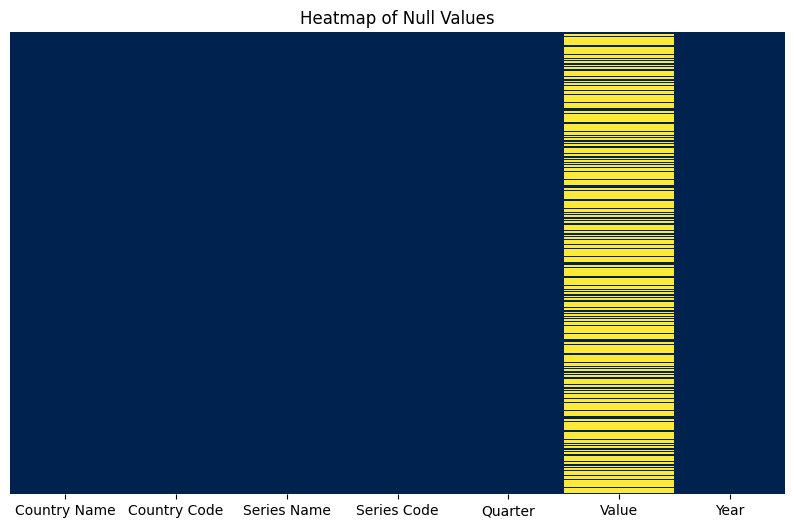

In [36]:
# Set the dataframe you want to visualize
df_QPSD_heat = df_QPSD_filtered  # or df_WDI_filtered / df_SPI_filtered

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_QPSD_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()

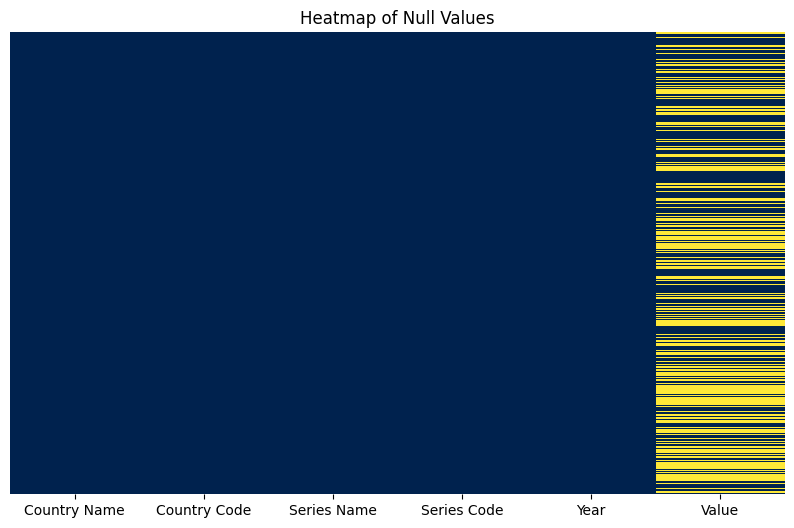

In [37]:
# Set the dataframe you want to visualize
df_WDI_heat = df_WDI_filtered  # or df_WDI_filtered / df_SPI_filtered

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_WDI_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()


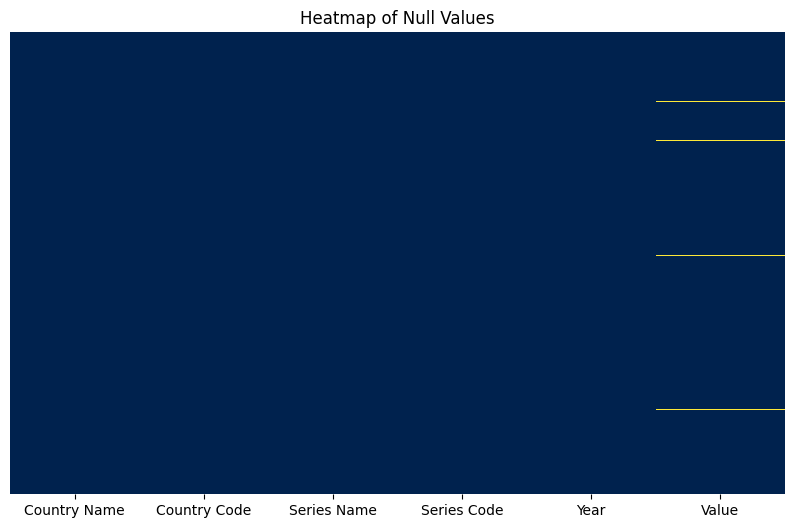

In [38]:
# Set the dataframe you want to visualize
df_SPI_heat = df_SPI_filtered  # or df_WDI_filtered / df_SPI_filtered

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_SPI_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()


In [39]:
# Add source labels
df_QPSD_filtered['Source'] = 'QPSD'
df_WDI_filtered['Source'] = 'WDI'
df_SPI_filtered['Source'] = 'SPI'

# Combine them into one dataset
df_combined = pd.concat([df_QPSD_filtered, df_WDI_filtered, df_SPI_filtered], ignore_index=True)

# Preview the result
df_combined.head()
df_combined.to_csv("/content/Combined_Indicators_Data.csv", index=False)

<ipython-input-39-52db26a77abd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WDI_filtered['Source'] = 'WDI'
<ipython-input-39-52db26a77abd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SPI_filtered['Source'] = 'SPI'


In [40]:
df_combined.shape

(1220166, 8)

In [41]:
df_combined.dtypes

,0
Country Name,object
Country Code,object
Series Name,object
Series Code,object
Quarter,object
Value,object
Year,int64
Source,object


In [42]:
df_combined['Value'] = pd.to_numeric(df_combined['Value'], errors='coerce')

In [43]:
df_combined.dtypes

,0
Country Name,object
Country Code,object
Series Name,object
Series Code,object
Quarter,object
Value,float64
Year,int64
Source,object


In [44]:
df_combined['Value'] = pd.to_numeric(df_combined['Value'], errors='coerce')
df_combined['Value'].describe()

,Value
count,4.696400e+05
mean,1.175084e+13
std,2.673973e+14
min,-5.382066e+14
25%,3.500000e+00
50%,5.979355e+01
75%,3.450346e+09
max,2.089238e+16


In [45]:
# Get unique series names from df_combined
unique_series = df_combined['Series Name'].dropna().unique()
df_unique_series = pd.DataFrame(sorted(unique_series), columns=["Series Name"])


In [46]:
# Get mapping of Series Name to Source(s)
series_sources = df_combined[['Series Name', 'Source']].dropna().drop_duplicates()

# Aggregate multiple sources per series into a single string (e.g., "WDI, SPI")
series_sources_agg = series_sources.groupby('Series Name')['Source'].agg(lambda x: ', '.join(sorted(set(x)))).reset_index()

# Merge with your unique series DataFrame
df_unique_series_with_source = df_unique_series.merge(series_sources_agg, on='Series Name', how='left')

# Rename column for clarity
df_unique_series_with_source.rename(columns={'Source': 'Source File(s)'}, inplace=True)

df_unique_series_with_source.head()


,Series Name,Source File(s)
0,ARI treatment (% of children under 5 taken to ...,WDI
1,Access to clean fuels and technologies for coo...,WDI
2,Access to clean fuels and technologies for coo...,WDI
3,Access to clean fuels and technologies for coo...,WDI
4,Access to electricity (% of population),WDI


In [47]:
df_unique_series_with_source.to_csv("Unique_Series_List.csv", index=False)

In [48]:
import pandas as pd

# Load each category CSV to extract its Series Names
categories_files = {
    'Economical_Indicators': '/content/Economical_Indicators.csv',
    'Environmental_Indicators': '/content/Environmental_Indicators.csv',
    'Financial_Indicators': '/content/Financial_Indicators.csv',
    'Public_Debt_Indicators': '/content/Public_Debt_Indicators.csv',
    'Social_Indicators': '/content/Social_Indicators.csv',
    'Statistical_Indicators': '/content/Statistical_Indicators.csv',
    'Uncategorized': '/content/Uncategorized.csv'
}

# Create a mapping from Series Name to Category
series_to_category = {}

for category, filepath in categories_files.items():
    df = pd.read_csv(filepath)
    for series_name in df['Series Name'].dropna().unique():
        series_to_category[series_name] = category

# Apply the mapping to df_combined
df_combined['Indicator Category'] = df_combined['Series Name'].map(series_to_category)

# Check how many series were matched and how many remain unmatched
matched_count = df_combined['Indicator Category'].notna().sum()
unmatched_count = df_combined['Indicator Category'].isna().sum()

matched_count, unmatched_count


<ipython-input-48-57c43febf7e6>:18: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


(np.int64(1220166), np.int64(0))

In [49]:
# Define a base output path
base_path = "/content/"

# Initialize a dictionary to track saved file paths
saved_files = {}

# Loop through each unique category and save a CSV
for category in df_combined['Indicator Category'].dropna().unique():
    category_df = df_combined[df_combined['Indicator Category'] == category]
    filename = f"{category}.csv"
    file_path = base_path + filename
    category_df.to_csv(file_path, index=False)
    saved_files[category] = file_path

saved_files


{'Financial_Indicators': '/content/Financial_Indicators.csv',
 'Economical_Indicators': '/content/Economical_Indicators.csv',
 'Public_Debt_Indicators': '/content/Public_Debt_Indicators.csv',
 'Environmental_Indicators': '/content/Environmental_Indicators.csv',
 'Social_Indicators': '/content/Social_Indicators.csv',
 'Statistical_Indicators': '/content/Statistical_Indicators.csv',
 'Uncategorized': '/content/Uncategorized.csv'}

In [50]:
df_economical=pd.read_csv('/content/Economical_Indicators.csv')
df_environmental=pd.read_csv('/content/Environmental_Indicators.csv')
df_financial=pd.read_csv('/content/Financial_Indicators.csv')
df_publicdebt=pd.read_csv('/content/Public_Debt_Indicators.csv')
df_social=pd.read_csv('/content/Social_Indicators.csv')
df_statistical=pd.read_csv('/content/Statistical_Indicators.csv')
df_uncategorized=pd.read_csv('/content/Uncategorized.csv')

<ipython-input-50-ca6d55ca9771>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_economical=pd.read_csv('/content/Economical_Indicators.csv')


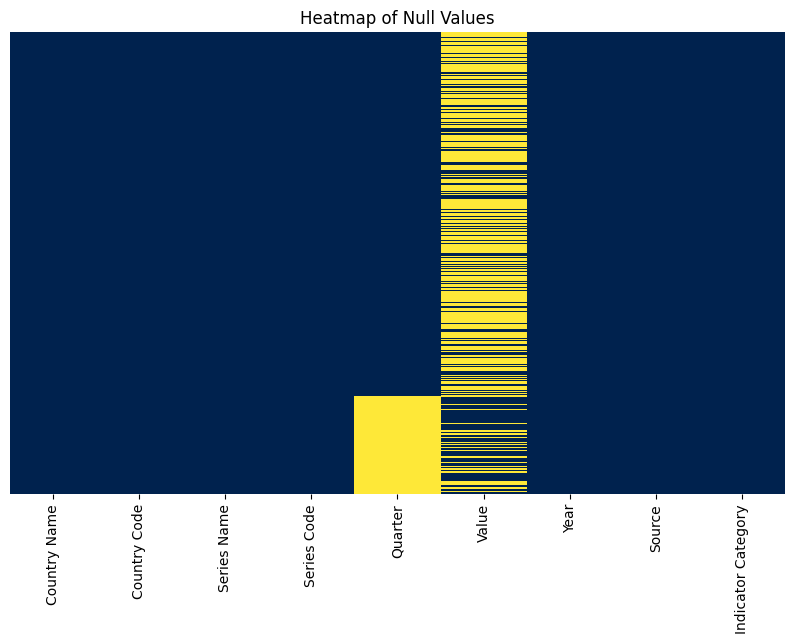

In [51]:
# Set the dataframe you want to visualize
df_economical_heat = df_economical

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_economical_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()


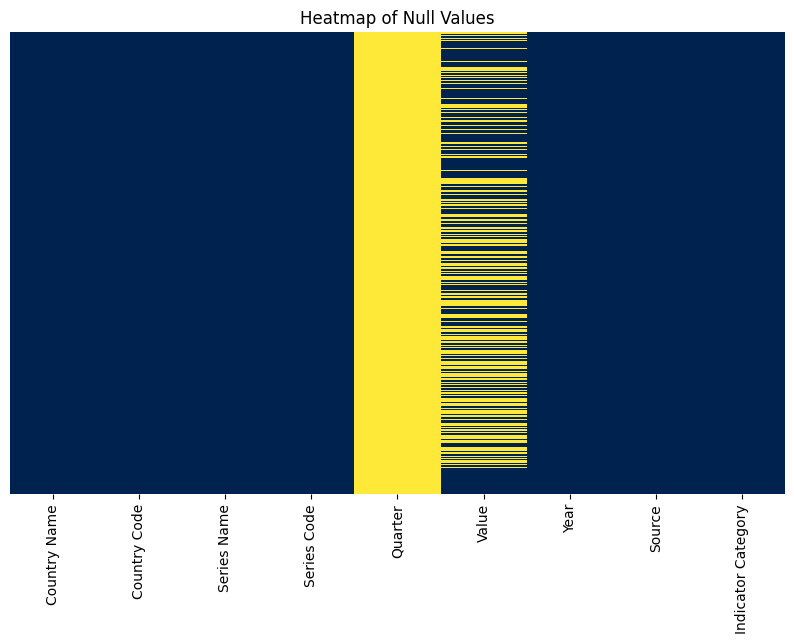

In [52]:
# Set the dataframe you want to visualize
df_environmental_heat = df_environmental

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_environmental_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()


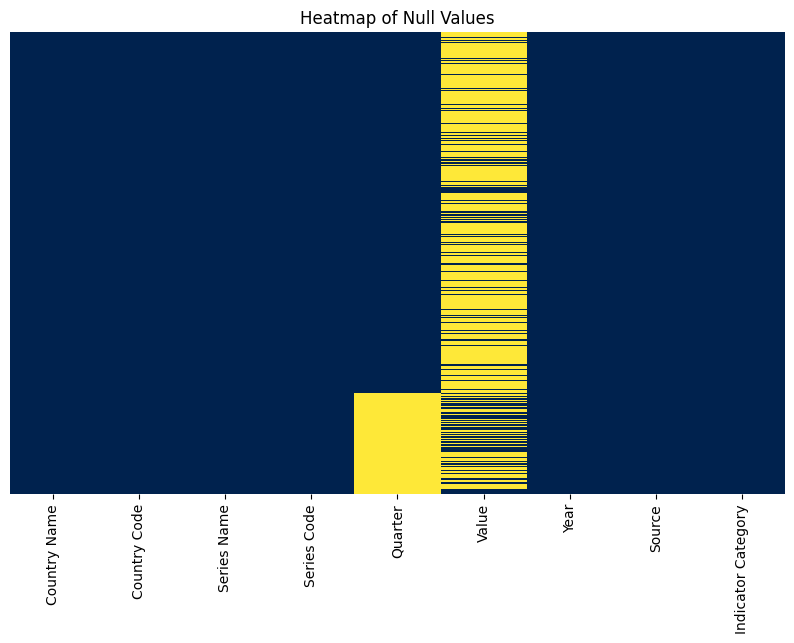

In [53]:
# Set the dataframe you want to visualize
df_financial_heat = df_financial

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_financial_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()


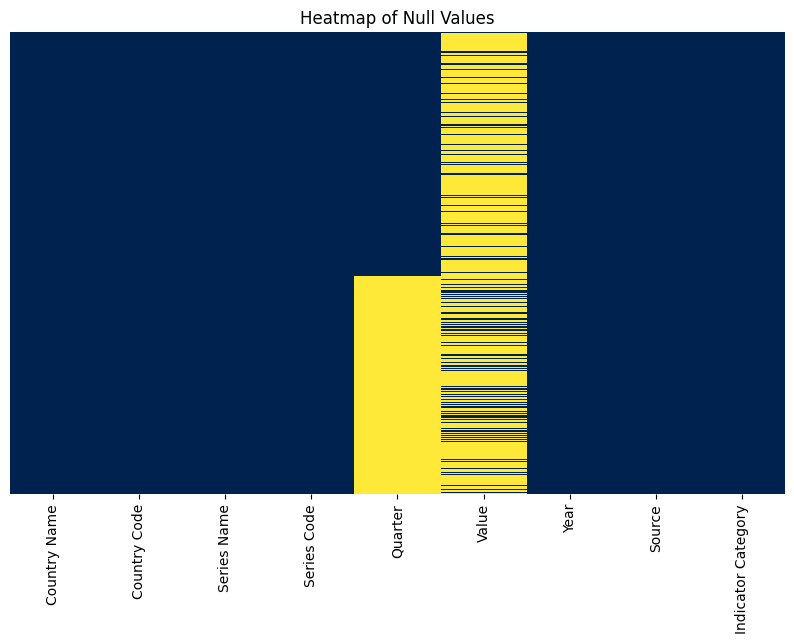

In [54]:
# Set the dataframe you want to visualize
df_publicdebt_heat = df_publicdebt

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_publicdebt_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()


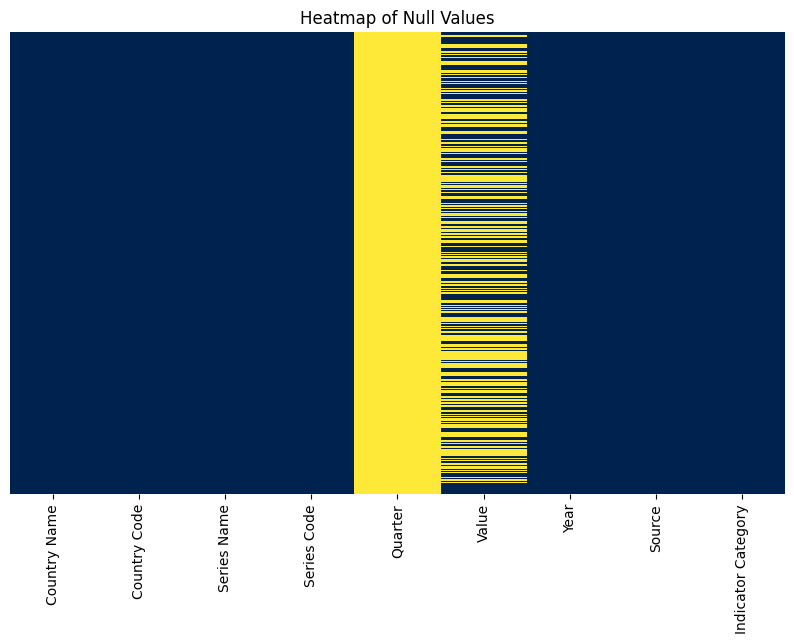

In [55]:
# Set the dataframe you want to visualize
df_social_heat = df_social

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_social_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()

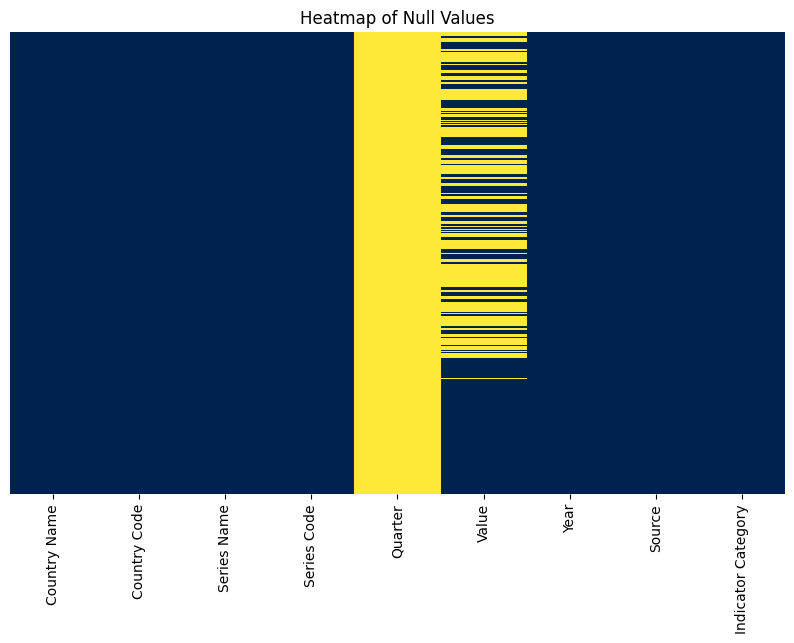

In [56]:
# Set the dataframe you want to visualize
df_statistical_heat = df_statistical

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_statistical_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()

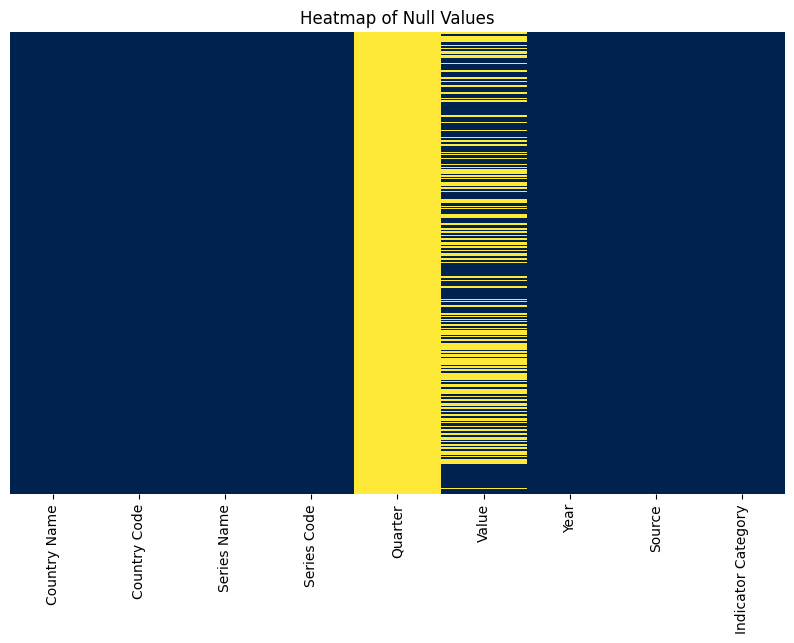

In [57]:
# Set the dataframe you want to visualize
df_uncategorized_heat = df_uncategorized

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap of null values
sns.heatmap(df_uncategorized_heat.isnull(), cbar=False, cmap='cividis', yticklabels=False)

# Add title
plt.title("Heatmap of Null Values")
plt.show()

In [58]:
# The count of missing values in each column
missing_values = df_economical.isnull().sum()
print(missing_values)
df_economical.shape

Country Name               0
Country Code               0
Series Name                0
Series Code                0
Quarter               133878
Value                 399352
Year                       0
Source                     0
Indicator Category         0
dtype: int64


(632502, 9)

In [59]:
df_economical['Quarter'] = df_economical['Quarter'].fillna('Annual')

In [60]:
# The count of missing values in each column
missing_values = df_economical.isnull().sum()
print(missing_values)
df_economical.shape

Country Name               0
Country Code               0
Series Name                0
Series Code                0
Quarter                    0
Value                 399352
Year                       0
Source                     0
Indicator Category         0
dtype: int64


(632502, 9)

In [61]:
df_economical.groupby('Series Name')['Value'].apply(lambda x: x.isna().mean()).sort_values(ascending=False).head(10)


,Value
Series Name,
B-READY: Business Insolvency Pillar 1: Quality of Regulations for Judicial Insolvency Proceedings,1.0
B-READY: Business Location Pillar 1: Quality of Regulations for Business Location,1.0
B-READY: Business Location Pillar 2: Quality of Public Services and Transparency of Information for Business Location,1.0
B-READY: Dispute Resolution Pillar 2: Public Services for Dispute Resolution,1.0
B-READY: International Trade Pillar 1: Quality of Regulations for International Trade,1.0
B-READY: International Trade Pillar 2: Quality of Public Services for the Facilitation of International Trade,1.0
B-READY: Utility Services Pillar 2: Quality of Governance and Transparency of Utility Services,1.0
B-READY: Utility Services Pillar 1: Quality of Regulations on Utility Services,1.0
B-READY: Taxation Pillar 2: Public Services Provided by the Tax Administration,1.0


In [62]:
country_counts = df_economical.groupby('Country Name').size().sort_values(ascending=False)
print(country_counts.head(10))


Country Name
Albania                   5967
Argentina                 5967
Armenia                   5967
Australia                 5967
Austria                   5967
Bangladesh                5967
Barbados                  5967
Belgium                   5967
Bolivia                   5967
Bosnia and Herzegovina    5967
dtype: int64


In [63]:
country_avg = df_economical.groupby('Country Name')['Value'].mean().sort_values(ascending=False)
print(country_avg.head(20))


Country Name
Indonesia             8.380311e+14
Korea, Rep.           1.143926e+14
Colombia              8.738634e+13
Japan                 7.873578e+13
Lebanon               3.416649e+13
Paraguay              1.953764e+13
Chile                 1.606244e+13
Cambodia              1.150439e+13
Tanzania              9.002040e+12
Uganda                8.200733e+12
Nigeria               6.877785e+12
Russian Federation    6.804547e+12
Argentina             6.801794e+12
Congo, Dem. Rep.      6.212692e+12
China                 6.094517e+12
United States         5.561944e+12
Hungary               5.182120e+12
Pakistan              4.485093e+12
Mongolia              3.855370e+12
Cote d'Ivoire         3.798765e+12
Name: Value, dtype: float64


In [64]:
missing_summary = df_economical.groupby('Country Name')['Value'].apply(
    lambda x: f"{x.notna().sum()} present / {x.isna().sum()} missing"
)
print(missing_summary.head(106))


Country Name
Albania           2722 present / 3245 missing
Argentina         1462 present / 4505 missing
Armenia           1876 present / 4091 missing
Australia         3595 present / 2372 missing
Austria           2957 present / 3010 missing
                             ...             
Turkiye           2849 present / 3118 missing
Uganda            2643 present / 3324 missing
United Kingdom    3980 present / 1987 missing
United States     2269 present / 3698 missing
Uruguay           1803 present / 4164 missing
Name: Value, Length: 106, dtype: object


In [65]:
# Calculate missing percentage per country
missing_percentage = df_economical.groupby('Country Name')['Value'].apply(
    lambda x: x.isna().mean() * 100
).sort_values(ascending=False)

# Convert to DataFrame for export and display
df_missing_percentage = missing_percentage.reset_index()
df_missing_percentage.columns = ['Country Name', 'Missing Value Percentage']
pd.set_option('display.max_rows', None)  # Show all rows in the notebook
df_missing_percentage

,Country Name,Missing Value Percentage
0,Malawi,89.240825
1,Nigeria,89.106754
2,Togo,86.794034
3,Seychelles,85.805262
4,Bolivia,85.721468
5,Tanzania,84.917044
6,Maldives,83.643372
7,Papua New Guinea,83.291436
8,Timor-Leste,83.056812
9,Cambodia,81.632311


In [66]:
country_code = 'USA'

# Filter the dataset for the specified country
country_data = df_economical[df_economical['Country Code'] == country_code]

# Calculate the percentage of missing values in the 'Value' column
missing_percentage = country_data['Value'].isna().mean() * 100

print(f"Missing Value Percentage for {country_code}: {missing_percentage:.2f}%")


Missing Value Percentage for USA: 61.97%


In [67]:
missing_summary_combined = df_combined.groupby('Country Name')['Value'].apply(
    lambda x: f"{x.notna().sum()} present / {x.isna().sum()} missing"
)
print(missing_summary_combined.head(106))

# Calculate missing percentage per country
missing_percentage_combined = df_combined.groupby('Country Name')['Value'].apply(
    lambda x: x.isna().mean() * 100
).sort_values(ascending=False)

# Convert to DataFrame for export and display
df_missing_percentage_combined = missing_percentage_combined.reset_index()
df_missing_percentage_combined.columns = ['Country Name', 'Missing Value Percentage']
pd.set_option('display.max_rows', None)  # Show all rows in the notebook
df_missing_percentage_combined

Country Name
Albania                   5200 present / 6311 missing
Argentina                 3475 present / 8036 missing
Armenia                   4355 present / 7156 missing
Australia                 6450 present / 5061 missing
Austria                   5103 present / 6408 missing
Bangladesh                6449 present / 5062 missing
Barbados                  2783 present / 8728 missing
Belgium                   4137 present / 7374 missing
Bolivia                   2814 present / 8697 missing
Bosnia and Herzegovina    5003 present / 6508 missing
Botswana                  3319 present / 8192 missing
Brazil                    5009 present / 6502 missing
Bulgaria                  4186 present / 7325 missing
Burkina Faso              3271 present / 8240 missing
Cambodia                  3093 present / 8418 missing
Canada                    4292 present / 7219 missing
Chile                     3236 present / 8275 missing
China                     3081 present / 8430 missing
Colombia       

,Country Name,Missing Value Percentage
0,Seychelles,81.078968
1,Malawi,80.331856
2,Nigeria,78.855008
3,Togo,77.247850
4,Maldives,76.639736
5,Papua New Guinea,76.048997
6,Tanzania,76.031622
7,Barbados,75.823126
8,Bolivia,75.553818
9,Timor-Leste,75.440883


In [68]:
missing_by_year = df_combined.groupby('Year')['Value'].apply(lambda x: x.isna().mean() * 100)
missing_by_year = missing_by_year.reset_index()
missing_by_year.columns = ['Year', 'Missing Value Percentage']

print(missing_by_year)

   Year  Missing Value Percentage
0  2021                 57.596589
1  2022                 60.694283
2  2023                 66.239594


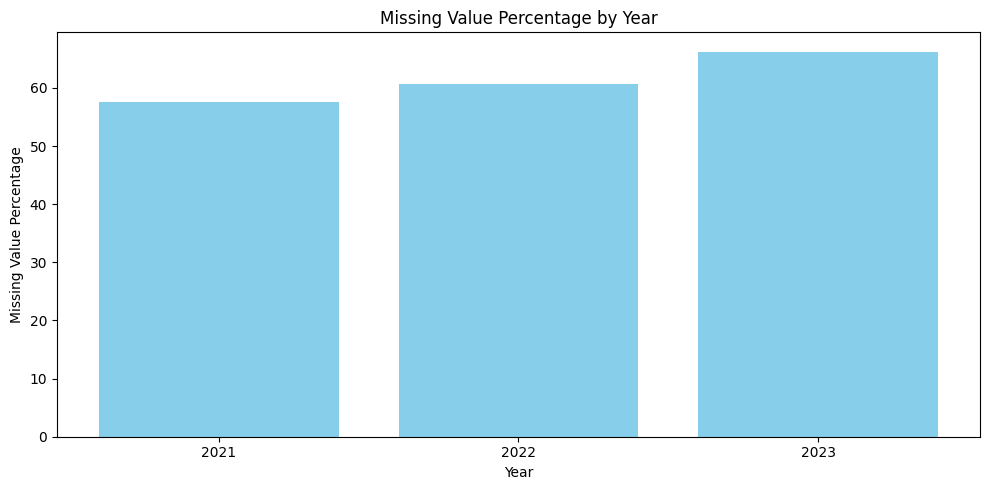

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(missing_by_year['Year'], missing_by_year['Missing Value Percentage'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Missing Value Percentage')
plt.title('Missing Value Percentage by Year')
plt.xticks(missing_by_year['Year'])  # Ensure all years are labeled
plt.tight_layout()
plt.show()

In [70]:
missing_by_source = df_combined.groupby('Source')['Value'].apply(lambda x: x.isna().mean() * 100)
missing_by_source = missing_by_source.reset_index()
missing_by_source.columns = ['Source', 'Missing Value Percentage']

print(missing_by_source)


  Source  Missing Value Percentage
0   QPSD                 73.718303
1    SPI                  0.960867
2    WDI                 46.147642


In [71]:
least_20_countries = df_missing_percentage_combined.sort_values(by='Missing Value Percentage').head(20)['Country Name']
df_combined_least20 = df_combined[df_combined['Country Name'].isin(least_20_countries)]
print(df_combined_least20['Country Name'].value_counts())

Country Name
Australia             11511
Bangladesh            11511
Colombia              11511
Costa Rica            11511
Dominican Republic    11511
El Salvador           11511
Georgia               11511
Honduras              11511
Indonesia             11511
Ireland               11511
Kazakhstan            11511
Kenya                 11511
Mauritius             11511
Mexico                11511
Moldova               11511
Peru                  11511
Slovak Republic       11511
South Africa          11511
Thailand              11511
United Kingdom        11511
Name: count, dtype: int64


In [72]:
!pip install pycountry

import plotly.express as px
import pycountry

def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

df_missing_percentage_combined['Country Code'] = df_missing_percentage_combined['Country Name'].apply(get_country_code)

# Drop rows with missing codes
df_map = df_missing_percentage_combined.dropna(subset=['Country Code'])

# Create the choropleth
fig = px.choropleth(
    df_map,
    locations='Country Code',
    color='Missing Value Percentage',
    hover_name='Country Name',
    color_continuous_scale='Reds',
    title='Missing Value Percentage by Country (All Indicators)',
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


In [73]:
# Group by Country Name and calculate missing percentage
missing_percentage_least20 = df_combined_least20.groupby('Country Name')['Value'].apply(
    lambda x: x.isna().mean() * 100
).sort_values()

# Convert to DataFrame for display
df_missing_percentage_least20 = missing_percentage_least20.reset_index()
df_missing_percentage_least20.columns = ['Country Name', 'Missing Value Percentage']

# Display the result
df_missing_percentage_least20


,Country Name,Missing Value Percentage
0,Indonesia,23.264703
1,El Salvador,25.332291
2,South Africa,30.249327
3,Honduras,32.777343
4,Mexico,38.502302
5,Georgia,38.919295
6,United Kingdom,39.040917
7,Slovak Republic,40.317957
8,Colombia,42.819911
9,Australia,43.966641


In [74]:
domain_groups = df_combined.groupby('Indicator Category')

<Axes: >

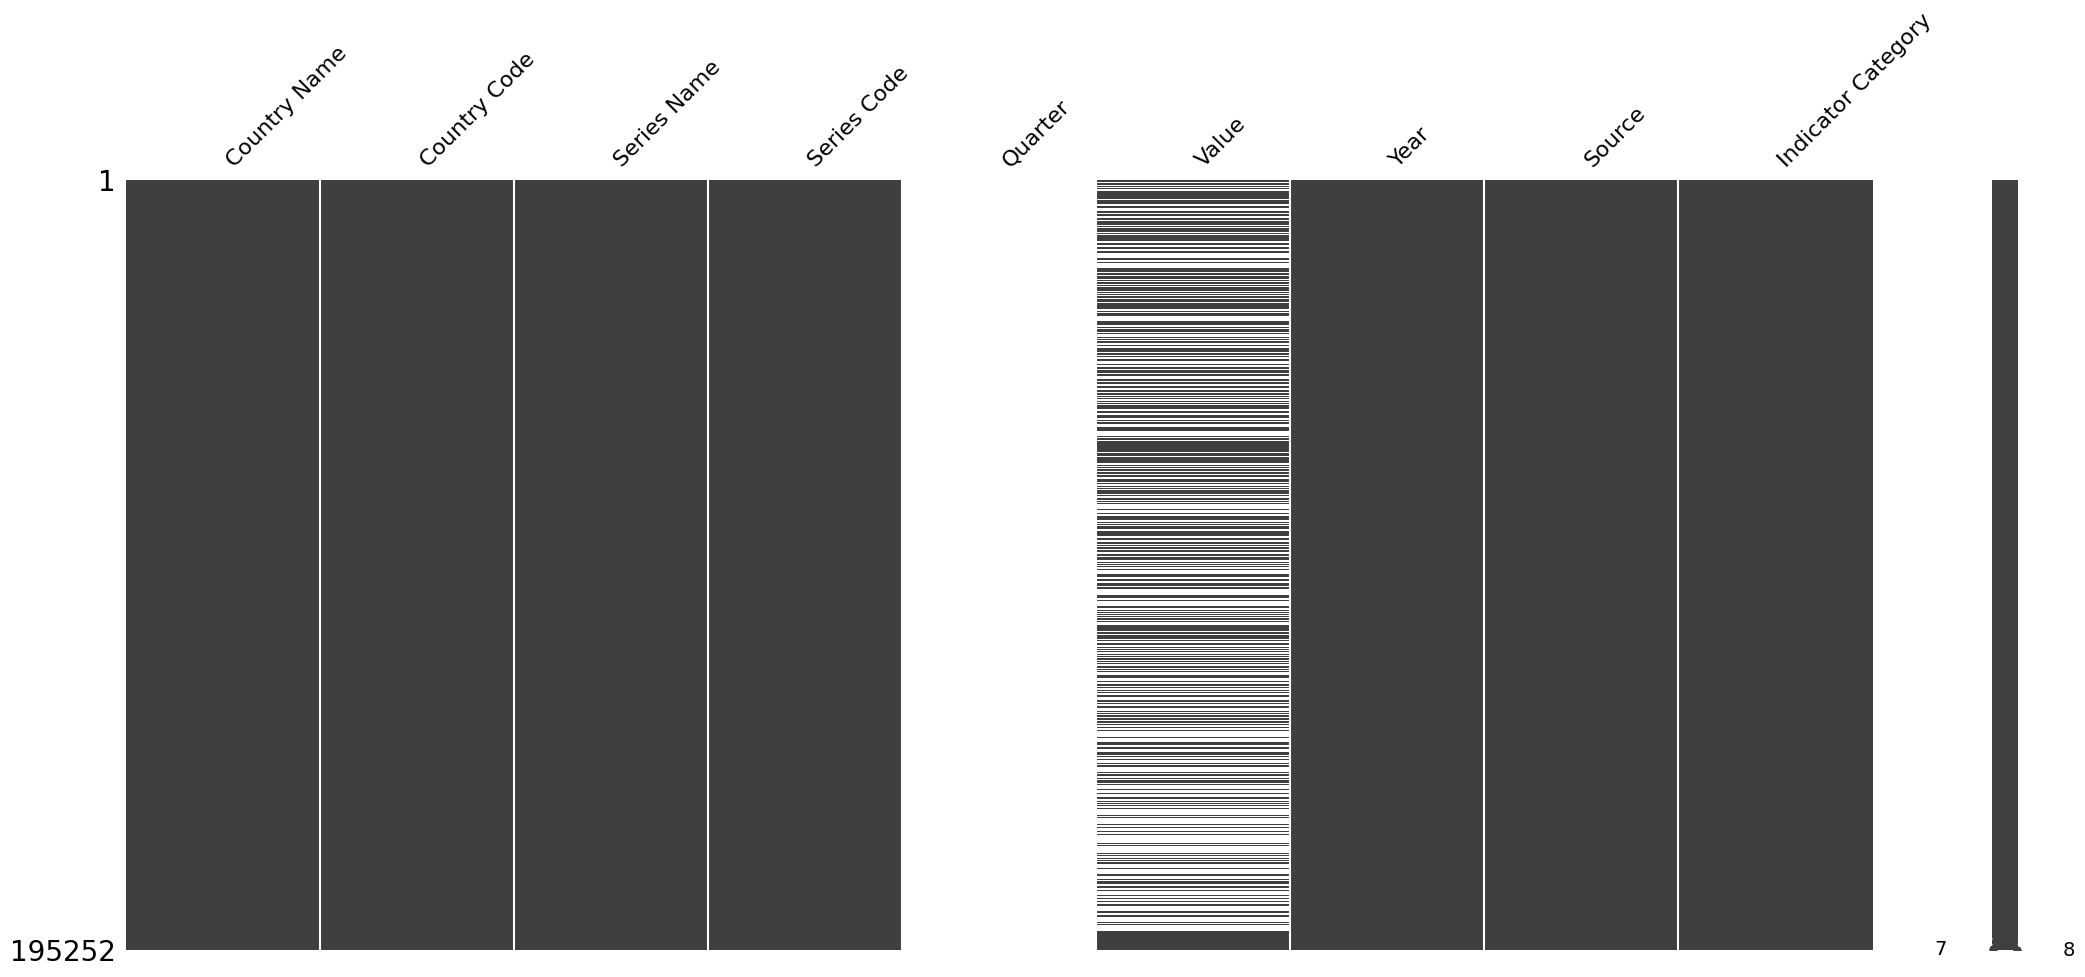

In [75]:
import missingno as msno
msno.matrix(df_combined[df_combined['Indicator Category'] == 'Social_Indicators'])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter out countries with >70% missing data
countries_to_keep = df_missing_percentage_combined[df_missing_percentage_combined['Missing Value Percentage'] < 70]['Country Name'].tolist()

# Create a filtered dataset with only countries below 70% threshold
df_filtered = df_combined[df_combined['Country Name'].isin(countries_to_keep)]
print(f"Original data shape: {df_combined.shape}, Filtered data shape: {df_filtered.shape}")

# 2. Split the dataset by indicator category for domain-specific imputation
categories = df_filtered['Indicator Category'].unique()

# Create empty DataFrame to store imputed results
df_imputed = pd.DataFrame()

# 3. Loop through each category and apply appropriate imputation
for category in categories:
    print(f"Processing category: {category}")

    # Get data for this category
    category_data = df_filtered[df_filtered['Indicator Category'] == category].copy()

    # Split countries by missing data percentage
    country_missing_pct = category_data.groupby('Country Name')['Value'].apply(
        lambda x: x.isna().mean() * 100
    )

    medium_missing_countries = country_missing_pct[
        (country_missing_pct >= 40) & (country_missing_pct < 70)
    ].index.tolist()

    low_missing_countries = country_missing_pct[country_missing_pct < 40].index.tolist()

    # Process each Series Name separately for better imputation
    for series_name in category_data['Series Name'].unique():
        try:
            series_data = category_data[category_data['Series Name'] == series_name].copy()

            # If there are enough data points, create a pivot table for imputation
            if len(series_data) > 10:  # Ensure we have enough data points
                # Create a pivot table for easier imputation (Country × Year)
                pivot = series_data.pivot_table(
                    index='Country Name',
                    columns='Year',
                    values='Value'
                )

                # Skip if pivot table is empty or has only one row/column
                if pivot.shape[0] <= 1 or pivot.shape[1] <= 1:
                    df_imputed = pd.concat([df_imputed, series_data], ignore_index=True)
                    continue

                # Impute missing values based on country missingness level
                imputed_pivot = pivot.copy()

                # For countries with 40-70% missing data: simple methods
                medium_missing_in_pivot = [c for c in medium_missing_countries if c in pivot.index]
                if len(medium_missing_in_pivot) > 0:
                    # Time-based interpolation (within each country)
                    for country in medium_missing_in_pivot:
                        try:
                            imputed_pivot.loc[country] = pivot.loc[country].interpolate(
                                method='linear', limit_direction='both'
                            )
                        except Exception as e:
                            print(f"Interpolation error for {country}, series {series_name}: {e}")

                    # Fill remaining NaNs with mean of similar countries
                    for year in imputed_pivot.columns:
                        if imputed_pivot[year].isna().any():
                            year_mean = imputed_pivot[year].mean()
                            if pd.notna(year_mean):
                                imputed_pivot[year] = imputed_pivot[year].fillna(year_mean)

                # For countries with <40% missing data: more advanced methods
                low_missing_in_pivot = [c for c in low_missing_countries if c in pivot.index]
                if len(low_missing_in_pivot) >= 3:  # Need at least 3 countries for KNN
                    # Extract just the low missing countries data
                    low_missing_pivot = pivot.loc[low_missing_in_pivot]

                    # Check if we have enough non-NaN values and consistent shapes
                    if (low_missing_pivot.shape[0] >= 3 and low_missing_pivot.shape[1] >= 2 and
                        low_missing_pivot.count().min() > 1 and  # At least some non-NaN values in each column
                        not low_missing_pivot.isna().all().any()):  # No columns with all NaNs

                        # First fill any completely empty columns with mean
                        for col in low_missing_pivot.columns:
                            if low_missing_pivot[col].isna().all():
                                low_missing_pivot[col] = low_missing_pivot.mean(axis=1).mean()

                        # Apply KNN imputation
                        try:
                            knn_imputer = KNNImputer(n_neighbors=min(3, low_missing_pivot.shape[0]-1))
                            imputed_values = knn_imputer.fit_transform(low_missing_pivot)

                            # Ensure shapes match before creating DataFrame
                            if imputed_values.shape == (low_missing_pivot.shape[0], low_missing_pivot.shape[1]):
                                imputed_low_missing = pd.DataFrame(
                                    imputed_values,
                                    index=low_missing_pivot.index,
                                    columns=low_missing_pivot.columns
                                )

                                # Update the imputed pivot with KNN results
                                for country in imputed_low_missing.index:
                                    imputed_pivot.loc[country] = imputed_low_missing.loc[country]
                            else:
                                print(f"Shape mismatch for {series_name}: {imputed_values.shape} vs {low_missing_pivot.shape}")
                        except Exception as e:
                            print(f"KNN imputation error for series {series_name}: {e}")

                # Convert the imputed pivot back to the original format
                # Handle any remaining NaNs before melting
                imputed_pivot = imputed_pivot.fillna(imputed_pivot.mean().mean())

                imputed_long = imputed_pivot.reset_index().melt(
                    id_vars='Country Name',
                    var_name='Year',
                    value_name='Imputed Value'
                )

                # Merge with original data to get all columns
                series_imputed = series_data.merge(
                    imputed_long,
                    on=['Country Name', 'Year'],
                    how='left'
                )

                # Use imputed values where original values are missing
                series_imputed['Value'] = np.where(
                    series_imputed['Value'].isna(),
                    series_imputed['Imputed Value'],
                    series_imputed['Value']
                )

                # Drop the temporary column
                series_imputed = series_imputed.drop('Imputed Value', axis=1)

                # Add to our results
                df_imputed = pd.concat([df_imputed, series_imputed], ignore_index=True)
            else:
                # If not enough data, keep original
                df_imputed = pd.concat([df_imputed, series_data], ignore_index=True)

        except Exception as e:
            print(f"Error processing series {series_name}: {e}")
            # Keep original data in case of errors
            series_data = category_data[category_data['Series Name'] == series_name].copy()
            df_imputed = pd.concat([df_imputed, series_data], ignore_index=True)

# 4. For any remaining missing values, apply a simple mean imputation by series and year
# This is a simpler approach than the iterative imputer and more robust
print("Applying simple mean imputation for any remaining missing values...")

series_year_means = df_imputed.groupby(['Series Name', 'Year'])['Value'].transform('mean')
df_imputed['Value'] = df_imputed['Value'].fillna(series_year_means)

# If still missing values, try just series means
if df_imputed['Value'].isna().any():
    series_means = df_imputed.groupby('Series Name')['Value'].transform('mean')
    df_imputed['Value'] = df_imputed['Value'].fillna(series_means)

# 5. Calculate imputation statistics
original_missing = df_filtered['Value'].isna().sum()
final_missing = df_imputed['Value'].isna().sum()
imputed_count = original_missing - final_missing

print(f"Original missing values: {original_missing}")
print(f"Values imputed: {imputed_count}")
print(f"Remaining missing values: {final_missing}")
print(f"Imputation percentage: {imputed_count/original_missing*100:.2f}%")

# 6. Visualize imputation results - only if not too large
if df_filtered.shape[0] < 100000:  # Only for reasonably sized datasets
    plt.figure(figsize=(12, 6))

    # Sample for visualization if too large
    sample_countries = np.random.choice(countries_to_keep, min(15, len(countries_to_keep)), replace=False)
    sample_years = np.random.choice(df_filtered['Year'].unique(), min(10, len(df_filtered['Year'].unique())), replace=False)

    # Original missing data
    plt.subplot(1, 2, 1)
    sample_before = df_filtered[
        (df_filtered['Country Name'].isin(sample_countries)) &
        (df_filtered['Year'].isin(sample_years))
    ]
    before_pivot = sample_before.pivot_table(
        index='Country Name',
        columns='Year',
        values='Value',
        aggfunc='mean'
    )
    sns.heatmap(before_pivot.isna(), cmap='viridis', cbar_kws={'label': 'Missing'})
    plt.title('Missing Values Before Imputation (Sample)')
    plt.tight_layout()

    # Imputed data
    plt.subplot(1, 2, 2)
    sample_after = df_imputed[
        (df_imputed['Country Name'].isin(sample_countries)) &
        (df_imputed['Year'].isin(sample_years))
    ]
    after_pivot = sample_after.pivot_table(
        index='Country Name',
        columns='Year',
        values='Value',
        aggfunc='mean'
    )
    sns.heatmap(after_pivot.isna(), cmap='viridis', cbar_kws={'label': 'Missing'})
    plt.title('Missing Values After Imputation (Sample)')
    plt.tight_layout()

    plt.savefig('imputation_comparison.png')
    plt.show()

# 7. Save imputed dataset
df_imputed.to_csv('imputed_data_less_than_70_missing.csv', index=False)

# 8. Add flag for imputed values
df_imputed['Imputed'] = 'No'  # Default value

# Create a temporary match key for both dataframes
df_filtered['match_key'] = df_filtered['Country Name'] + '_' + df_filtered['Series Name'] + '_' + df_filtered['Year'].astype(str)
df_imputed['match_key'] = df_imputed['Country Name'] + '_' + df_imputed['Series Name'] + '_' + df_imputed['Year'].astype(str)

# Identify rows with missing values in original but values in imputed
filtered_missing_keys = df_filtered[df_filtered['Value'].isna()]['match_key'].unique()
df_imputed.loc[df_imputed['match_key'].isin(filtered_missing_keys), 'Imputed'] = 'Yes'

# Clean up
df_imputed.drop('match_key', axis=1, inplace=True)

# 9. Simple validation - print value ranges before and after
print("\nValue ranges before imputation:")
print(df_filtered['Value'].describe())

print("\nValue ranges after imputation:")
print(df_imputed['Value'].describe())

# 10. Show summary of imputed values by country
imputed_by_country = df_imputed[df_imputed['Imputed'] == 'Yes'].groupby('Country Name').size()
total_by_country = df_imputed.groupby('Country Name').size()
imputation_ratio = (imputed_by_country / total_by_country * 100).sort_values(ascending=False)

print("\nTop 10 countries by percentage of imputed values:")
print(imputation_ratio.head(10))

Original data shape: (1220166, 9), Filtered data shape: (874836, 9)
Processing category: Financial_Indicators
Processing category: Economical_Indicators


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the imputed data with optimizations
df_imputed = pd.read_csv('imputed_data_less_than_70_missing.csv', low_memory=False)
df_filtered = pd.read_csv('/content/Combined_Indicators_Data.csv', low_memory=False)

print(f"Loaded imputed data with {len(df_imputed)} rows")

# 2. Create the imputation flag by comparing values in original vs imputed dataset
print("Creating imputation flag...")

# Create matching keys for identification
df_filtered['match_key'] = df_filtered['Country Name'] + '_' + df_filtered['Series Name'] + '_' + df_filtered['Year'].astype(str)
df_imputed['match_key'] = df_imputed['Country Name'] + '_' + df_imputed['Series Name'] + '_' + df_imputed['Year'].astype(str)

# Create a dictionary for quick lookup of missing values in original data
missing_keys = set()
for idx, row in df_filtered.iterrows():
    if pd.isna(row['Value']):
        missing_keys.add(row['match_key'])
    if idx % 100000 == 0:
        print(f"Processed {idx} rows of original data")

# Create the imputation flag
df_imputed['Imputed'] = df_imputed['match_key'].apply(lambda x: 'Yes' if x in missing_keys else 'No')
print(f"Identified {(df_imputed['Imputed'] == 'Yes').sum()} imputed values")

# Drop temporary keys
df_imputed.drop('match_key', axis=1, inplace=True)

# 3. Simple analysis for the economic resilience study
# A. Calculate imputation percentages by indicator category
imputed_by_category = df_imputed.groupby('Indicator Category')['Imputed'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values()

print("\nImputation percentage by indicator category:")
for category, pct in imputed_by_category.items():
    print(f"{category}: {pct:.1f}%")

# B. Calculate imputation percentages by year (recent years)
recent_years = sorted(df_imputed['Year'].unique())[-5:]
year_imputation = df_imputed[df_imputed['Year'].isin(recent_years)].groupby('Year')['Imputed'].apply(
    lambda x: (x == 'Yes').mean() * 100
)

print("\nImputation percentage by recent years:")
for year, pct in year_imputation.items():
    print(f"{year}: {pct:.1f}%")

# C. Examine key economic, social, and financial indicators
key_indicators = {
    'Economic': [
        'GDP growth (annual %)',
        'Inflation, consumer prices (annual %)',
        'Unemployment, total (% of total labor force)'
    ],
    'Social': [
        'GINI index',
        'Poverty headcount ratio at national poverty lines (% of population)',
        'School enrollment, primary (% gross)'
    ],
    'Financial': [
        'Domestic credit to private sector (% of GDP)',
        'Market capitalization of listed domestic companies (% of GDP)',
        'Bank capital to assets ratio (%)'
    ]
}

# Calculate imputation percentages for these indicators
print("\nImputation percentage for key indicators:")
for category, indicators in key_indicators.items():
    print(f"\n{category} Indicators:")
    for indicator in indicators:
        if indicator in df_imputed['Series Name'].unique():
            imputed_pct = (df_imputed[df_imputed['Series Name'] == indicator]['Imputed'] == 'Yes').mean() * 100
            print(f"  {indicator}: {imputed_pct:.1f}%")
        else:
            print(f"  {indicator}: Not found in dataset")

# D. Calculate imputation percentages for top 10 countries
top_countries = df_imputed['Country Name'].value_counts().head(10).index
country_imputation = df_imputed[df_imputed['Country Name'].isin(top_countries)].groupby('Country Name')['Imputed'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values()

print("\nImputation percentage for top 10 countries by data volume:")
for country, pct in country_imputation.items():
    print(f"{country}: {pct:.1f}%")

# 4. Visualize distribution of original vs imputed values for Economic indicators
print("\nCreating visualization for Economic indicators...")
if 'Economical_Indicators' in df_imputed['Indicator Category'].unique():
    # Sample data for visualization to keep it lightweight
    econ_data = df_imputed[df_imputed['Indicator Category'] == 'Economical_Indicators']
    econ_sample = pd.concat([
        econ_data[econ_data['Imputed'] == 'No'].sample(min(5000, len(econ_data[econ_data['Imputed'] == 'No']))),
        econ_data[econ_data['Imputed'] == 'Yes'].sample(min(5000, len(econ_data[econ_data['Imputed'] == 'Yes'])))
    ])

    # Create histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=econ_sample,
        x='Value',
        hue='Imputed',
        element='step',
        stat='density',
        common_norm=False,
        bins=30
    )
    plt.title('Distribution of Original vs Imputed Values for Economic Indicators')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('economic_values_distribution.png')
    plt.close()
    print("Saved economic values distribution visualization")

# 5. Save summary statistics to a file
summary_data = []

# By indicator category
for category in df_imputed['Indicator Category'].unique():
    category_data = df_imputed[df_imputed['Indicator Category'] == category]
    total = len(category_data)
    imputed = (category_data['Imputed'] == 'Yes').sum()
    imputed_pct = (imputed / total) * 100 if total > 0 else 0

    summary_data.append({
        'Group Type': 'Indicator Category',
        'Group': category,
        'Total Points': total,
        'Imputed Points': imputed,
        'Imputation %': imputed_pct
    })

# By year (recent 5 years)
for year in recent_years:
    year_data = df_imputed[df_imputed['Year'] == year]
    total = len(year_data)
    imputed = (year_data['Imputed'] == 'Yes').sum()
    imputed_pct = (imputed / total) * 100 if total > 0 else 0

    summary_data.append({
        'Group Type': 'Year',
        'Group': str(year),
        'Total Points': total,
        'Imputed Points': imputed,
        'Imputation %': imputed_pct
    })

# By top 15 countries
top15_countries = df_imputed['Country Name'].value_counts().head(15).index
for country in top15_countries:
    country_data = df_imputed[df_imputed['Country Name'] == country]
    total = len(country_data)
    imputed = (country_data['Imputed'] == 'Yes').sum()
    imputed_pct = (imputed / total) * 100 if total > 0 else 0

    summary_data.append({
        'Group Type': 'Country',
        'Group': country,
        'Total Points': total,
        'Imputed Points': imputed,
        'Imputation %': imputed_pct
    })

# Save to CSV
summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('imputation_summary_statistics.csv', index=False)
print("\nSaved imputation summary statistics to CSV file")

print("\nAnalysis complete!")

In [ ]:
# Analyze missing values by country
missing_by_country = df_imputed.groupby('Country Name')['Value'].apply(lambda x: x.isna().mean() * 100)
missing_by_country = missing_by_country.reset_index()
missing_by_country.columns = ['Country Name', 'Missing Value Percentage']
missing_by_country = missing_by_country.sort_values('Missing Value Percentage', ascending=False)

print("\nTop 10 countries with highest remaining missing values:")
print(missing_by_country.head(10))

In [ ]:
# Load the imputed data
df_imputed = pd.read_csv('imputed_data_less_than_70_missing.csv', low_memory=False)

# Calculate total missing values in the Value column
total_rows = len(df_imputed)
missing_values = df_imputed['Value'].isna().sum()
missing_percentage = (missing_values / total_rows) * 100

print(f"Total rows in dataset: {total_rows}")
print(f"Missing values in 'Value' column: {missing_values}")
print(f"Missing value percentage: {missing_percentage:.2f}%")
